# Exploratory Analysis (12.08.17)

We will now perform some exploratory analysis on the same dataset, through the following tutorial:

http://machinelearningmastery.com/understand-machine-learning-data-descriptive-statistics-python/

## Understand your Data with Descriptive Statistics Tutorial

### 1. Peeking at your Data

Here we will use the __.head()__ function to peek at the first few rows of our dataset.

Looking at your raw data can help you decide how to best preprocess, and handle that data for machine learning applications. 

In [17]:
import pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pandas.read_csv(url, names=names)
df.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Dimensions of your Data

The __.shape__ property can be used on your pandas dataframe to let you review the shape and size of your dataset.

In [18]:
df.shape

(768, 9)

### 3. Data Types for each Attribute

Using the __.dtypes__ property on your dataframe can return what types of attributes they are. This is helpful because it can tell you whether in the pre-processing phase, strings need to be converted to floats, or integers needed to represent categorical values.

In [19]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

Here for example, we see that mass and pedi are floating point (decimal) values.

### 4. Descriptive Statistics

The __.describe()__ function can be used on a dataframe to give you quick insight into the shape of each attribute. 

It provides you with the following __8 statistical properties__:

* Count
* Mean
* Standard Devaition
* Minimum Value
* 25th Percentile
* 50th Percentile (Median)
* 75th Percentile
* Maximum Value

In [20]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


When descibing your data this way, it is worth taking some time reviewing some observations from the data - whether that be noticing missing values, or discovering surprising distributions in the attributes. 

### 5. Class Distribution (Classification Only)

You can quickly get an idea of the distribution of classes by using the __.groupby('class').size()__ function.

In [21]:
df.groupby('class').size()

class
0    500
1    268
dtype: int64

Here, we can quickly see that there are nearly double the amount of observations with class 0 (no onset of diabetes), than those with class 1 (those that have diabetes).

### 6. Correlation Between Attributes

Correlation refers to the __relationship__ between two variables, and how they may or may not change each other.

The most common way for calculating correlations is by determining the [Pearson’s Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient):
* Assumes a normal distribution of the attributes involved.
* A correlation of -1 represents a full negative correlation
* A correlation of +1 represents a full positive correlation
* A correlation of 0 represents no correlation at all

The __corr()__ function can be used on a pandas dataframe to review all the __pair-wise correlations__ of the attributes in the dataset, and return a __correlation matrix__.

In [22]:
df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


As expected, the diagonal line through the matrix shows a perfect correlation of each attribute with itself

### 7. Skew of Univariate Distributions

Skew refers to a distribution that is assumed __Gaussian__ (normal or bell curve) that is __shifted__ or __squashed__ in one direction or another.

Many ML algorithms assume a Gaussian distribution, so knowing that an attribute has a skew may allow you to better pre-process your data to correct this skew and therefore later improve the accuracy of your models.

The __.skew()__ function can be used on a Pandas DataFrame to quickly calculate the skew of each attribute in the DataFrame. 

In [23]:
df.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

* __positive values__ shows a __right skew__ 
* __negative values__ show a __left skew__
* values close to __zero__ show nearly __no skew__

## Summary

In this tutorial we looked at 7 different ways to summarize your dataset using Python and Pandas:

1. Peeking at your data:    __.head()__
2. Dimensions of your Data:    __.shape__
3. Data Types:    __.dtypes__
4. Class Distribution:__.describe()__
5. Data Summary: __.groupby('class').size()__
6. Correlations: __.corr()__
7. Skewness: __.skew()__

## . . .

# Visualizing ML Algorithms with Python Pandas

Here we will look at the following tutorial: 

http://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

. . .

The fastest way to learn more about your data is through __data visualization__. 


## Univariate Plots

In this section we will look at techniques that you can use to understand each attribute independently.

## Histograms

* provide a fast way to get an idea of the __distribution__ of __each attribute__

Histograms group data into bins, providing a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is __Gaussian__, __skewed__, or even has an __exponential distribution__. It can also help you spot __possible outliers__.

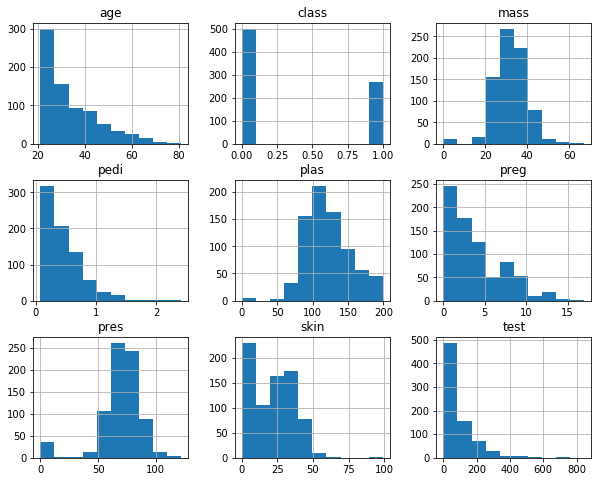

In [34]:
import matplotlib.pyplot as plt

df.hist(figsize=(10,8))
plt.show()

Here we can see that age, pedi, and test, have an exponential distribution.

## Density Plots

* provide a quick way to get the idea of the __distribution__ of each __attribute__
* look like an abstracted histogram with a __smooth curve__ drawn through the __top__ of each bin

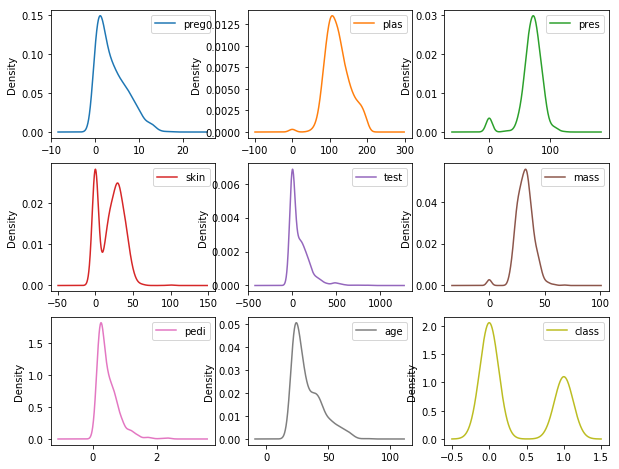

In [36]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10,8))
plt.show()

## Box and Whisker Plots

* summarize the distribution of each attribute
* draws a __line__ for the __median__ (middle value)
* draws a __box__ around the __25th__ and __75th percentiles__
* __whiskers__ show __outliers__ (values that are 1.5 times greater than the size of spread about the median)

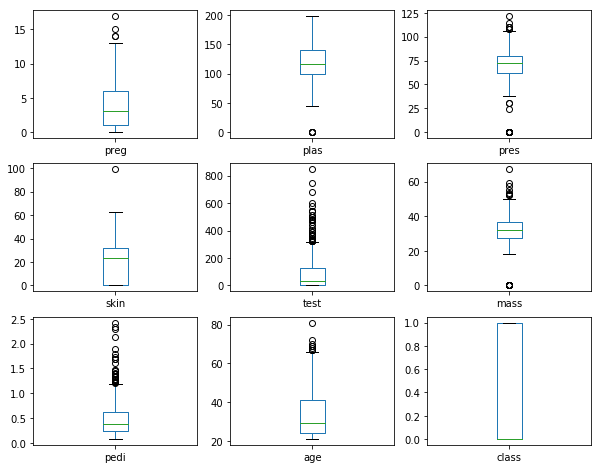

In [39]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))
plt.show()

# Multivariate Plots

This section shows examples of plots with interactions between __multiple variables__.

## Correlation Matrix Plot

Just like before, in the data exploration section, we will calculate a __correlation matrix__. However, this time we will visualize the output in the form of a graph.

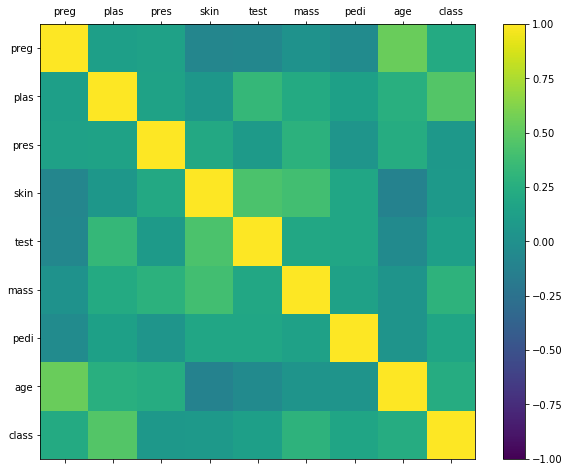

In [42]:
correlations = df.corr()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

We can see that the matrix is __symmetrical__ about the diagonal. Observing this symmetry is useful, as we can see two different views on the same data in one plot. 

## Scatterplot Matrix

A scatterplot shows the __relationship between two variables__ as __dots__ in __two dimensions__, __one axis for each attribute__. Drawing these scatterplots together is called a __scatterplot matrix__. 

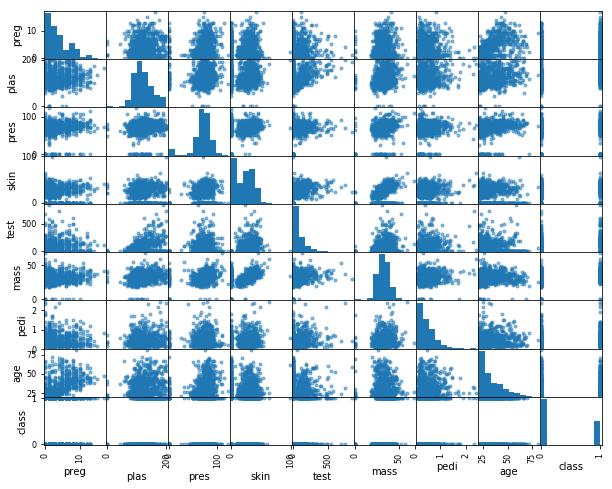

In [45]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df, figsize=(10,8))
plt.show()

Like the correlation matrix, the scatterplot matrix is __symmetrical__. This is useful as it lets you look at the __pair-wise relationships__ from different perspectives. 

Because there is little point in drawing a scatterplot of each variable with itself, the __diagonal__ shows __histograms__ of each attribute.

## Summary

In this section, we discovered how to visualize our data in the following ways:
* Histograms
* Density plots
* Box and whisker plots
* Correlation matrix plots
* Scatterplot matrix

Visualization is a key tool in a data scientist's toolbox, as it helps you rapidly understand the data you're dealing with.

# Pima Indians Diabetes Prediction

Now that we have discussed methods in data exploration and visualization, we will now try to make predictions on our dataset.

## Import Libraries

In [46]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [79]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima = pd.read_csv(url, names=names)

## Assign Features

In [80]:
X = pima.iloc[:,0:8]
y = pima.iloc[:,8]

## Preprocessing

* Remove missing values.
* Standardization

In [81]:
# mark zero values as missing or NaN
pima[[1,2,3,4,5]] = pima[[1,2,3,4,5]].replace(0, numpy.NaN)
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class,1,2,3,4,5
0,6,148,72,35,0,33.6,0.627,50,1,148.0,72.0,35.0,NaN,33.6
1,1,85,66,29,0,26.6,0.351,31,0,85.0,66.0,29.0,NaN,26.6
2,8,183,64,0,0,23.3,0.672,32,1,183.0,64.0,NaN,NaN,23.3
3,1,89,66,23,94,28.1,0.167,21,0,89.0,66.0,23.0,94.0,28.1
4,0,137,40,35,168,43.1,2.288,33,1,137.0,40.0,35.0,168.0,43.1


In [82]:
from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X)

X = pd.DataFrame(data = rescaledX, columns = X.columns)

X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## Binary Classifcation



In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [85]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()

In [92]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y,
                                                   test_size=0.33,
                                                   random_state=123,
                                                   stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

(514, 8)
(514,)
(254, 8)
(254,)


ValueError: Found input variables with inconsistent numbers of samples: [514, 254]